<a href="https://colab.research.google.com/github/anish29292/BigDataProgramming/blob/master/cluster_skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14.0
import re 
import os
import gensim
import numpy as np
from gensim.models import Word2Vec, FastText
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import json

     |████████████████████████████████| 109.2MB 84kB/s 
     |████████████████████████████████| 3.2MB 54.1MB/s 
     |████████████████████████████████| 491kB 50.7MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
with open('/content/jobs.json', encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [4]:
import pandas as pd
# converting json dataset from dictionary to dataframe
data = pd.DataFrame.from_dict(data)
data.reset_index(level=0, inplace=True)

In [5]:
data

,level_0,index,job_title,job_type,start_date,duration,company,location,posted_date,country,contact_person,job_id,skill,job_description
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,"[Embedded, Python, Testautomatisierung, C, Tes...",[]
1,1,1,Project Manager,Vor Ort,05.2020,5 Monate,Whitestone Technology Services GmbH,Nuremberg,19.03.2020,Deutschland,Asit Dutta,1911521,"[Projektassistenz, Projektleitung, Projektmana...",[]
2,2,2,Servicetechniker im Onsite Support (m/w/d),Vor Ort,05.2020,4 Monate (Verlängerung möglich),fonsit GbR,Köln,19.03.2020,Deutschland,Berhat Akkurt,1911520,"[Windows, Asset, Support, Servicetechniker, On...",[]
3,3,3,SAP PMO,Vor Ort,05.2020,4 Monate (Verlängerung möglich),Amoria Bond,Raum Frankfurt,19.03.2020,Deutschland,Sergej Kalaschjan,1911519,"[SAP, Personalberatung, PMO, Projektorganisation]",[]
4,4,4,Administrator (m/w/d) SIEM HP Arcsight #6812 6812,Vor Ort,2020-04-01,2020-06-30,Cegeka Deutschland GmbH,Hannover,19.03.2020,Deutschland,Manuela Fentrohs,1911518,"[Monitoring, Automatisierung, Meldewesen, Admi...","[Telefon: , E-Mail: , Ansprechpartner: Manuela..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,7146,7146,Rohrleitungsplanung,Vor Ort,27.03.2019,104 Wochen,Ferchau Engineering GmbH,Senden,27.03.2019,Deutschland,Jörn Dorna,1748463,"[ERP, AutoCAD, Dokumentation, Manager]",[]
7147,7147,7147,Elektrokonstrukteur (m/w/d) EPLAN,Vor Ort,01.04.2019,keine Angabe,Ferchau Engineering GmbH,Raum Paderborn,26.03.2019,Deutschland,Jörn Dorna,1747838,"[Elektrotechnik, EPLAN, Dokumentation]",[]
7148,7148,7148,JIRA Administrator (m/w/d) Bereich Atlassian J...,Vor Ort,03/2019,6 Monate +,GINTEC Gesellschaft für Informationstechnologi...,München,26.03.2019,Deutschland,Catharina von Consbruch,1747736,"[Customizing, Support, JIRA, Konfiguration, Ad...","[Ihre Aufgaben, \t, \t, \t, \t, Ihr Profil, \t..."
7149,7149,7149,Frontend Software Entwicklung (Angular),Vor Ort,22.03.2019,30 Wochen,Ferchau Engineering GmbH,Berlin,22.03.2019,Deutschland,Jörn Dorna,1746078,"[Programmierung, Software Entwicklung, HTML, S...",[]


In [6]:
new_data = data.explode('skill')

In [7]:
new_data

,level_0,index,job_title,job_type,start_date,duration,company,location,posted_date,country,contact_person,job_id,skill,job_description
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Embedded,[]
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Python,[]
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Testautomatisierung,[]
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,C,[]
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Test,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Design Patterns,[Tätigkeitenbeschreibung]
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Visual Design,[Tätigkeitenbeschreibung]
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Industrie Design,[Tätigkeitenbeschreibung]
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Design,[Tätigkeitenbeschreibung]


In [8]:
x = new_data[new_data['job_title'].str.contains("User Interface | Frontend")]

In [9]:
x

,level_0,index,job_title,job_type,start_date,duration,company,location,posted_date,country,contact_person,job_id,skill,job_description
152,152,152,35055 Frontend Developers UI5 für Einsatz in W...,Remote,04.2020,4 Monate,SuP Management GmbH,Walldorf,19.03.2020,Deutschland,Klaus-Jürgen Scholz,1911322,SAP,[]
152,152,152,35055 Frontend Developers UI5 für Einsatz in W...,Remote,04.2020,4 Monate,SuP Management GmbH,Walldorf,19.03.2020,Deutschland,Klaus-Jürgen Scholz,1911322,Anwendungsentwicklung,[]
152,152,152,35055 Frontend Developers UI5 für Einsatz in W...,Remote,04.2020,4 Monate,SuP Management GmbH,Walldorf,19.03.2020,Deutschland,Klaus-Jürgen Scholz,1911322,ABAP,[]
152,152,152,35055 Frontend Developers UI5 für Einsatz in W...,Remote,04.2020,4 Monate,SuP Management GmbH,Walldorf,19.03.2020,Deutschland,Klaus-Jürgen Scholz,1911322,Developer,[]
152,152,152,35055 Frontend Developers UI5 für Einsatz in W...,Remote,04.2020,4 Monate,SuP Management GmbH,Walldorf,19.03.2020,Deutschland,Klaus-Jürgen Scholz,1911322,SAP UI5,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Design Patterns,[Tätigkeitenbeschreibung]
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Visual Design,[Tätigkeitenbeschreibung]
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Industrie Design,[Tätigkeitenbeschreibung]
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Design,[Tätigkeitenbeschreibung]


In [59]:
y = new_data[new_data['job_title'].str.contains("Data | data scientist | data analyst | data engineer")]

In [60]:
y

,level_0,index,job_title,job_type,start_date,duration,company,location,posted_date,country,contact_person,job_id,skill,job_description,job_profile,job_profiles
206,206,206,Data Scientist - Frankfurt - Immediate Start -...,Vor Ort,03/2020,keine Angabe,Optimus Search,Frankfurt am Main,19.03.2020,Deutschland,,1911025,Datenbanken,[],Data Scientist - Frankfurt - Immediate Start -...,NaN
206,206,206,Data Scientist - Frankfurt - Immediate Start -...,Vor Ort,03/2020,keine Angabe,Optimus Search,Frankfurt am Main,19.03.2020,Deutschland,,1911025,MS SQL,[],Data Scientist - Frankfurt - Immediate Start -...,NaN
206,206,206,Data Scientist - Frankfurt - Immediate Start -...,Vor Ort,03/2020,keine Angabe,Optimus Search,Frankfurt am Main,19.03.2020,Deutschland,,1911025,SQL,[],Data Scientist - Frankfurt - Immediate Start -...,NaN
206,206,206,Data Scientist - Frankfurt - Immediate Start -...,Vor Ort,03/2020,keine Angabe,Optimus Search,Frankfurt am Main,19.03.2020,Deutschland,,1911025,Analyse,[],Data Scientist - Frankfurt - Immediate Start -...,NaN
206,206,206,Data Scientist - Frankfurt - Immediate Start -...,Vor Ort,03/2020,keine Angabe,Optimus Search,Frankfurt am Main,19.03.2020,Deutschland,,1911025,Datenbank,[],Data Scientist - Frankfurt - Immediate Start -...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,7074,7074,Data Scientists (m/w/d),Vor Ort,09/2019,3 MM,Krongaard AG,Deutschland,05.06.2019,Deutschland,Mathias Boesselmann,1780371,Oracle,[],Data Scientists (m/w/d),NaN
7074,7074,7074,Data Scientists (m/w/d),Vor Ort,09/2019,3 MM,Krongaard AG,Deutschland,05.06.2019,Deutschland,Mathias Boesselmann,1780371,MS SQL,[],Data Scientists (m/w/d),NaN
7074,7074,7074,Data Scientists (m/w/d),Vor Ort,09/2019,3 MM,Krongaard AG,Deutschland,05.06.2019,Deutschland,Mathias Boesselmann,1780371,Beratung,[],Data Scientists (m/w/d),NaN
7074,7074,7074,Data Scientists (m/w/d),Vor Ort,09/2019,3 MM,Krongaard AG,Deutschland,05.06.2019,Deutschland,Mathias Boesselmann,1780371,SQL,[],Data Scientists (m/w/d),NaN


In [87]:
new_data.loc[new_data['job_title'].str.contains('User Interface | Frontend'), 'job_profile'] = 'Frontend Developer'
# new_data['job_profile'] = new_data['job_title'].apply(lambda x: 'Frontend Developer' if ('user interface' or 'frontend') in x.lower() else None)
new_data.loc[new_data['job_title'].str.contains('Data Scientists | Data Scientists | Data Engineer | Data Analyst'), 'job_profile'] = 'Data Science'
new_data.loc[new_data['job_title'].str.contains('Support'), 'job_profile'] = 'IT Support'
new_data.loc[new_data['job_title'].str.contains('SAP'), 'job_profile'] = 'SAP Consultant'


In [76]:
new_data['job_profile'] = new_data['job_title'].apply(lambda x: 'SAP Consultant' if 'sap' in x.lower() else None)


In [77]:
new_data['job_profile'] = new_data['job_title'].apply(lambda x: 'IT Support' if 'support' in x.lower() else None)


In [78]:
new_data['job_profile'] = new_data['job_title'].apply(lambda x: 'Data Science' if ('data scientist' or 'data analyst' or 'data engineer' or 'data scientists') in x.lower() else None)


In [88]:
new_data

,level_0,index,job_title,job_type,start_date,duration,company,location,posted_date,country,contact_person,job_id,skill,job_description,job_profile,job_profiles
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Embedded,[],None,NaN
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Python,[],None,NaN
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Testautomatisierung,[],None,NaN
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,C,[],None,NaN
0,0,0,Systemtester (m/w/d) im Bereich Testspezifikat...,Vor Ort,ab sofort,3 Monate (Verlängerung möglich),Modis Contracting Solutions GmbH,Stuttgart,19.03.2020,Deutschland,Eda Avci,1911435,Test,[],None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Design Patterns,[Tätigkeitenbeschreibung],Frontend Developer,Frontend Developer
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Visual Design,[Tätigkeitenbeschreibung],Frontend Developer,Frontend Developer
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Industrie Design,[Tätigkeitenbeschreibung],Frontend Developer,Frontend Developer
7150,7150,7150,User Interface Designer (m/f/d),Vor Ort,01.04.2019,6M ++,esklusiv GmbH,Düsseldorf,1374,,Deutschland,1746023,Design,[Tätigkeitenbeschreibung],Frontend Developer,Frontend Developer


In [133]:
existing_df = new_data[['job_profile','skill']]
existing_df.index = new_data['skill']
existing_df.columns.names = ['skill']

In [134]:
existing_df = existing_df.dropna()

In [135]:
existing_df


skill,job_profile,skill
skill,,
Windows,IT Support,Windows
Asset,IT Support,Asset
Support,IT Support,Support
Servicetechniker,IT Support,Servicetechniker
Onsite Support,IT Support,Onsite Support
...,...,...
Design Patterns,Frontend Developer,Design Patterns
Visual Design,Frontend Developer,Visual Design
Industrie Design,Frontend Developer,Industrie Design


In [152]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df_encoded = existing_df.apply(le.fit_transform)
# new = OneHotEncoder().fit_transform(existing_df['job_profile'])


In [153]:
df_encoded

skill,job_profile,skill
skill,,
Windows,2,1413
Asset,2,92
Support,2,1282
Servicetechniker,2,1249
Onsite Support,2,657
...,...,...
Design Patterns,1,272
Visual Design,1,1383
Industrie Design,1,478


In [138]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(df_encoded)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [139]:
existing_2d = pca.transform(df_encoded)


In [140]:
existing_df_2d = pd.DataFrame(df_encoded)
existing_df_2d.index = df_encoded.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
skill,,
Windows,2,1413
Asset,2,92
Support,2,1282
Servicetechniker,2,1249
Onsite Support,2,657


In [141]:
print(pca.explained_variance_ratio_) 


[9.99997373e-01 2.62687538e-06]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0, flags=flags)


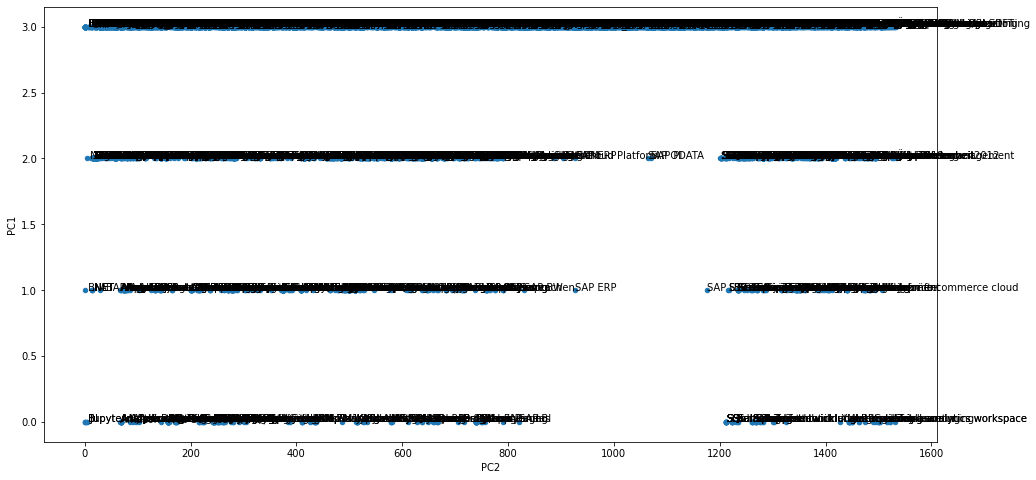

In [142]:
%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, profile in enumerate(df_encoded.index):
    ax.annotate(
        profile, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

In [161]:
from sklearn.cluster import KMeans

df = pd.DataFrame(df_encoded, columns=['job_profile', 'skill'])

kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df[['job_profile', 'skill']])

df['Cluster'] = y

print(df.head())

                  job_profile  skill  Cluster
skill                                        
Windows                     2   1413        2
Asset                       2     92        0
Support                     2   1282        2
Servicetechniker            2   1249        2
Onsite Support              2    657        1


In [165]:
plt.scatter(df[:,0],df[:,1], c=kmeans.labels_, cmap='rainbow')


TypeError: ignored

In [187]:
df_skills = new_data [['job_title','skill']]

In [190]:
df_skills

skill,job_title,skill
job_profile,,
0,6119,1404
0,6119,3337
0,6119,4631
0,6119,723
0,6119,4617
...,...,...
7150,6514,1198
7150,6514,4912
7150,6514,2128


In [189]:
df_skills = df_skills.apply(le.fit_transform)

x = df_skills[['job_title','skill']].to_numpy()
y = df_skills["job_title"].to_numpy()


estimator = KMeans(n_clusters=3)
y_kmeans = estimator.fit_predict(x)

Text(0, 0.5, 'Skills')

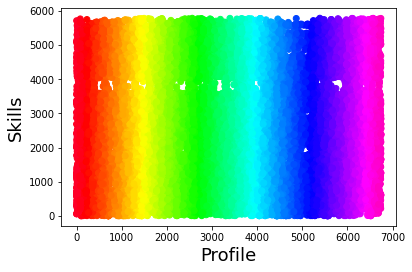

In [191]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Profile', fontsize=18)
plt.ylabel('Skills', fontsize=18)